https://docs.astropy.org/en/stable/timeseries/lombscargle.html

In [4]:
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy

In [9]:
# These are 100 noisy measurements taken at irregular times, with a frequency of 1 cycle per unit time.
rand = np.random.default_rng(42)
X = 100 * rand.random(100)
Y = np.sin(2 * np.pi * X) + 0.1 * rand.standard_normal(100)

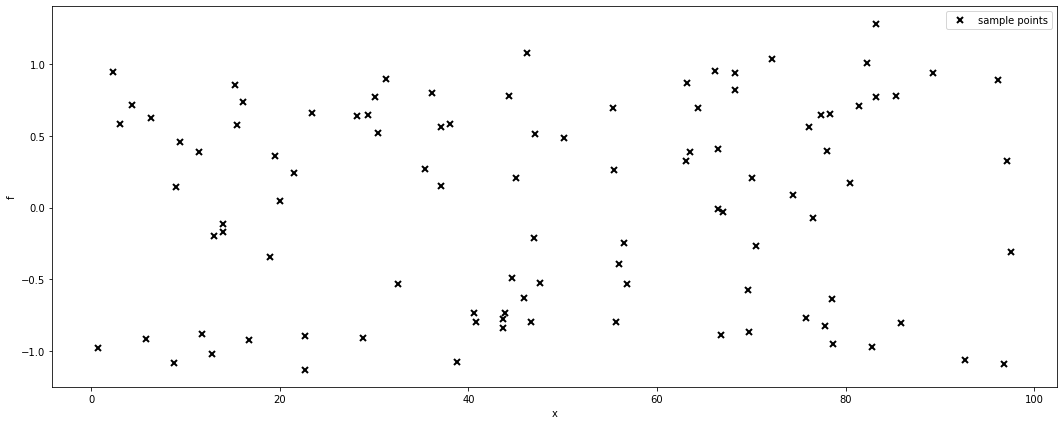

In [10]:
# Setup our figure environment
plt.figure(figsize=(18, 7))

# Plot observations
plt.plot(X, Y, "kx", mew=2)

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);

In [11]:
from astropy.timeseries import LombScargle

frequency, power = LombScargle(X,Y).autopower()

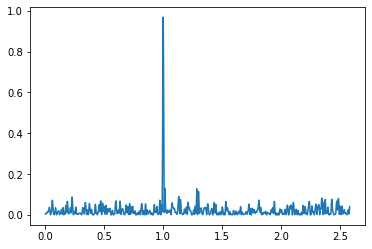

In [12]:
import matplotlib.pyplot as plt  

plt.plot(frequency, power)

In [13]:
# The LombScargle interface can also handle data with measurement uncertainties.
# If all uncertainties are the same, you can pass a scalar:
dy = 0.1

frequency, power = LombScargle(t, y, dy).autopower()

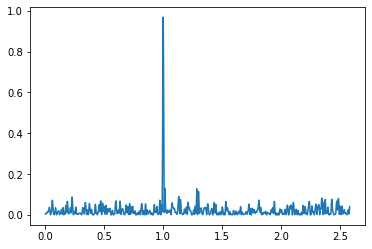

In [14]:
import matplotlib.pyplot as plt  

plt.plot(frequency, power)

In [17]:
import astropy.units as u

t_days = t * u.day
y_mags = y * u.mag
dy_mags = y * u.mag

frequency, power = LombScargle(t_days, y_mags, dy_mags).autopower()
frequency.unit

Unit("1 / d")

In [18]:
power.unit

Unit(dimensionless)

In [20]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(X,Y, dy)

best_frequency

<Quantity 1.00076417 1 / d>

In [21]:
Y_fit = ls.model(t_fit, best_frequency)

ValueError: frequency have units while 1/t doesn't.